<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/DS%20-%20Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

## **Dataset**

In [12]:
datasetRandFor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Titanic.csv")

#DEFINIÇÃO DAS COLUNAS
datasetRandFor.drop(['PassengerId', "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)

datasetRandFor.rename(columns={
    'Survived': 'sobreviveu',
    'Pclass': 'classe',
    'Name': 'nome',
    'Sex': 'sexo',
    'Age': 'idade',
    'Fare': 'tarifa',
}, inplace=True)

#TRADUÇÃO DOS VALORES
sobreviveu = {
    0: 'Não',
    1: 'Sim'
}
sexo = {
    'male': 'Homem',
    'female': 'Mulher'
}

datasetRandFor['sobreviveu'] = datasetRandFor['sobreviveu'].replace(sobreviveu)
datasetRandFor['sexo'] = datasetRandFor['sexo'].replace(sexo)

display(datasetRandFor.head())

,sobreviveu,classe,nome,sexo,idade,tarifa
0,Não,3,"Braund, Mr. Owen Harris",Homem,22.0,7.2500
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mulher,38.0,71.2833
2,Sim,3,"Heikkinen, Miss. Laina",Mulher,26.0,7.9250
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mulher,35.0,53.1000
4,Não,3,"Allen, Mr. William Henry",Homem,35.0,8.0500


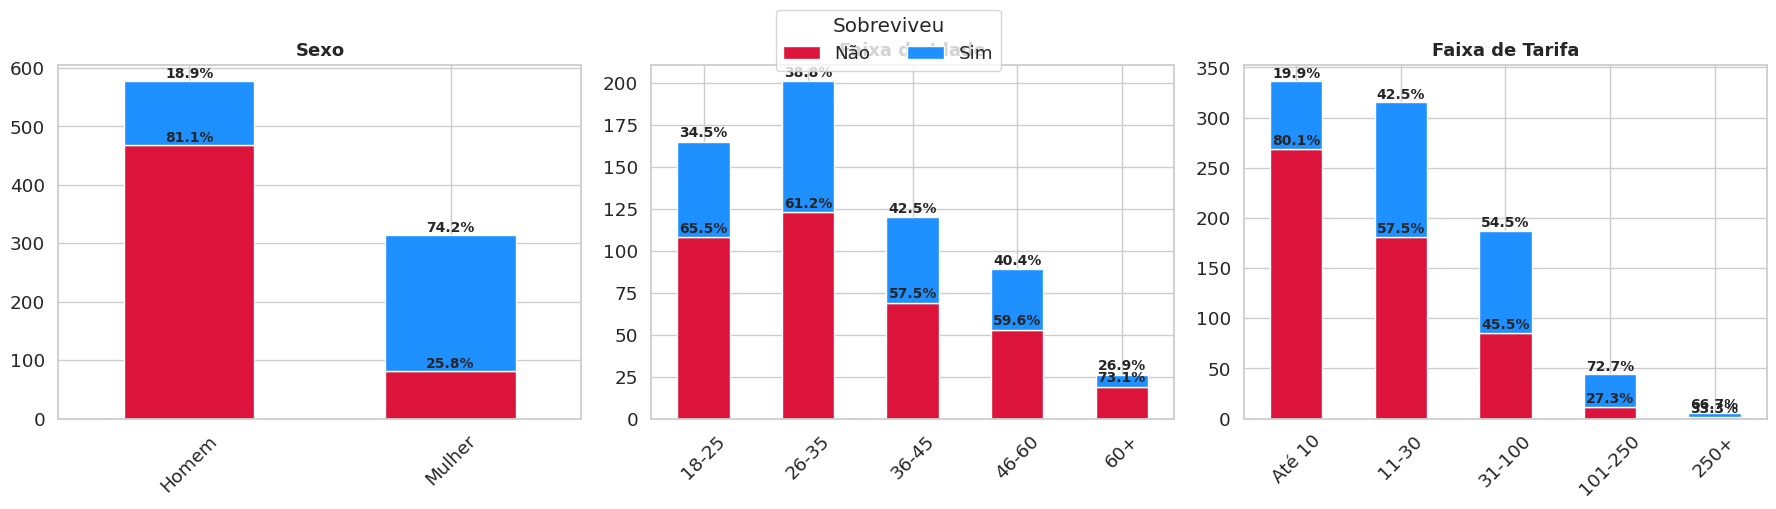

In [13]:
datasetRandForGraphics = datasetRandFor.copy()

bins = [18, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
datasetRandForGraphics['faixa_idade'] = pd.cut(datasetRandForGraphics['idade'], bins=bins, labels=labels, right=False)

bins_fare = [0, 10, 30, 100, 250, datasetRandForGraphics['tarifa'].max()]
labels_fare = ['Até 10', '11-30', '31-100', '101-250', '250+']
datasetRandForGraphics['faixa_tarifa'] = pd.cut(datasetRandForGraphics['tarifa'], bins=bins_fare, labels=labels_fare, right=False)

colunas_cat = datasetRandForGraphics.select_dtypes(include=['object', 'category']).columns.tolist()
colunas_cat.remove('sobreviveu')
colunas_cat.remove('nome')
total = len(colunas_cat)

nomes_arrumados = {
    "classe": "Classe",
    "sexo": "Sexo",
    "faixa_tarifa": "Faixa de Tarifa",
    "faixa_idade": "Faixa de Idade"
}

cols = 3
rows = (total + cols - 1) // cols

sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()



for i, coluna in enumerate(colunas_cat):

    ax = axes[i]

    contagem = datasetRandForGraphics.groupby([coluna, "sobreviveu"], observed=True).size().unstack(fill_value=0)

    contagem = contagem.reindex(columns=['Não', 'Sim'], fill_value=0)

    contagem.plot(
        kind='bar',
        stacked=True,
        color=['crimson', 'dodgerblue'],
        ax=ax,
        legend=False
    )

    for idx, categoria in enumerate(contagem.index):
        total = contagem.loc[categoria].sum()

        altura_acumulada = 0
        for risco, cor in zip(['Não', 'Sim'], ['crimson', 'dodgerblue']):
            valor = contagem.loc[categoria, risco]
            if valor > 0:
                percentual = (valor / total) * 100
                y_offset = altura_acumulada + valor
                ax.text(
                    idx,
                    y_offset + 1,
                    f"{percentual:.1f}%",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    weight='bold'
                )
                altura_acumulada += valor

    titulo = nomes_arrumados[coluna]
    ax.set_title(titulo, fontsize=13, fontweight='bold')

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.legend(['Não', 'Sim'], title='Sobreviveu', loc='upper center', bbox_to_anchor=(0.5, 1.04), ncol=2)

plt.tight_layout()
plt.show()

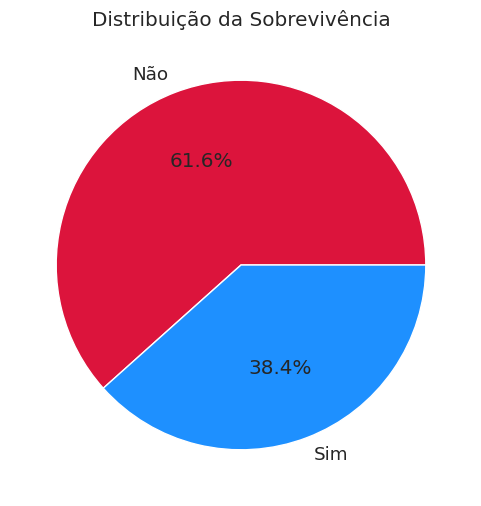

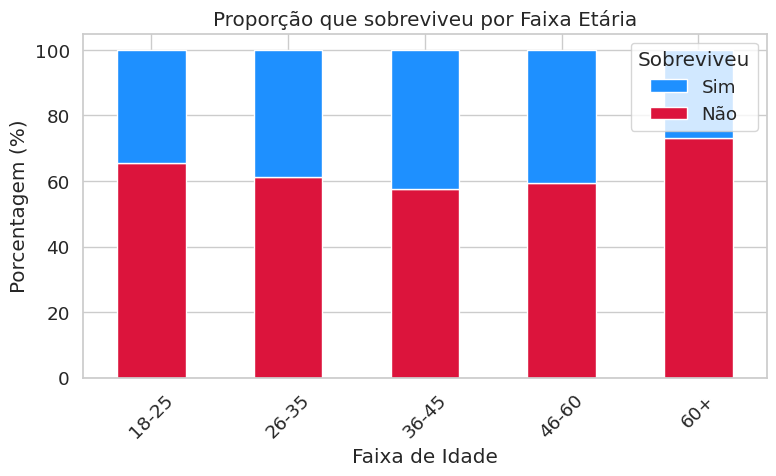

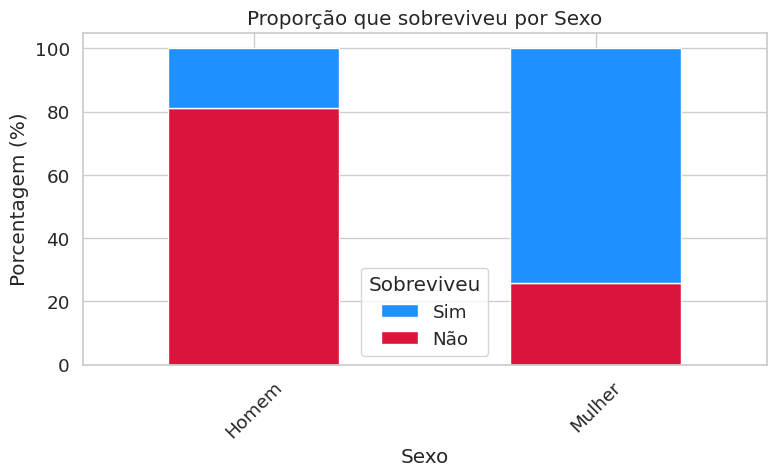

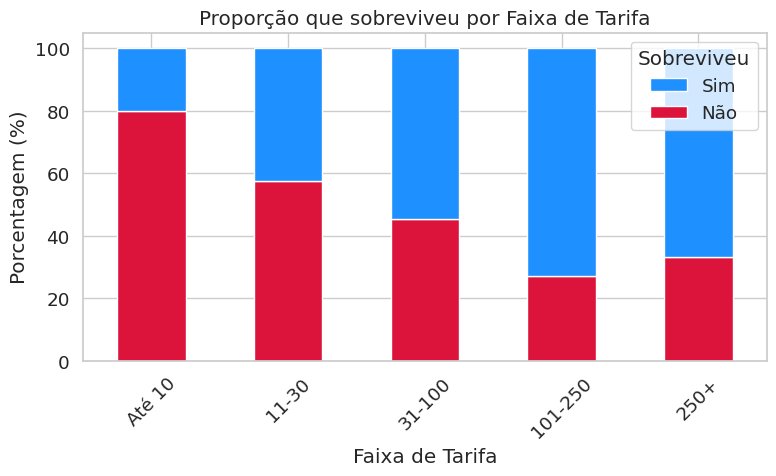

In [14]:
#DISTRIBUIÇÃO DO RISCO
datasetRandForGraphics["sobreviveu"].value_counts().reindex(["Não", "Sim"]).plot.pie(
    autopct="%1.1f%%",
    figsize=(6, 6),
    title="Distribuição da Sobrevivência",
    colors=['crimson', 'dodgerblue']
)


plt.ylabel("")
plt.show()

def grafico_empilhado_percentual(coluna, titulo, xlabel):
    contagem = datasetRandForGraphics.groupby([coluna, "sobreviveu"], observed=True).size().unstack(fill_value=0)

    contagem = contagem.reindex(columns=["Não", "Sim"])

    proporcao = contagem.div(contagem.sum(axis=1), axis=0) * 100

    ax = proporcao.plot(
        kind='bar',
        stacked=True,
        figsize=(8, 5),
        color=['crimson', 'dodgerblue']
    )

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], ["Sim", "Não"], title="Sobreviveu")

    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel("Porcentagem (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


grafico_empilhado_percentual("faixa_idade", "Proporção que sobreviveu por Faixa Etária", "Faixa de Idade")
grafico_empilhado_percentual("sexo", "Proporção que sobreviveu por Sexo", "Sexo")
grafico_empilhado_percentual("faixa_tarifa", "Proporção que sobreviveu por Faixa de Tarifa", "Faixa de Tarifa")

## **Modelo**

In [15]:
#DEFINIR VARIÁVEIS
datasetRandFor["sobreviveu"] = datasetRandFor["sobreviveu"].map({'Sim': 1, 'Não': 0})

XRandFor = datasetRandFor.drop(["sobreviveu", "nome"], axis=1)
YRandFor = datasetRandFor["sobreviveu"]

XRandFor = pd.get_dummies(XRandFor, drop_first=True)

#DIVISÃO EM TREINO E TESTE
XRandFor_treino, XRandFor_teste, YRandFor_treino, YRandFor_teste = train_test_split(XRandFor, YRandFor, test_size=0.2, random_state=42)

#TREINO DO MODELO
modelRandFor = RandomForestClassifier(
    n_estimators=3,
    max_depth=3,
    min_samples_split=3,
    random_state=42,
)

modelRandFor.fit(XRandFor_treino, YRandFor_treino)

RandomForestClassifier(max_depth=3, min_samples_split=3, n_estimators=3,
                       random_state=42)

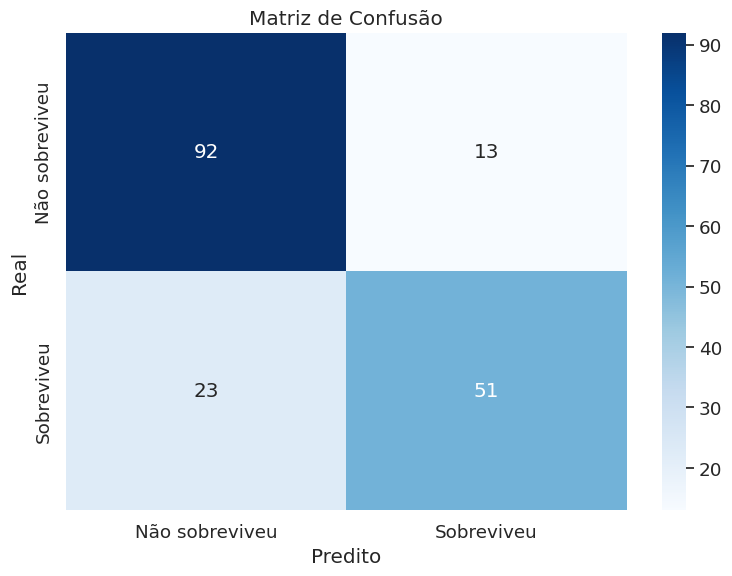

In [16]:
#PREVISÕES
YRandFor_pred = modelRandFor.predict(XRandFor_teste)

#MATRIZ DE CONFUSÃO
CM = confusion_matrix(YRandFor_teste, YRandFor_pred)
labels = ['Não sobreviveu', 'Sobreviveu']

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')

plt.tight_layout()
plt.show()

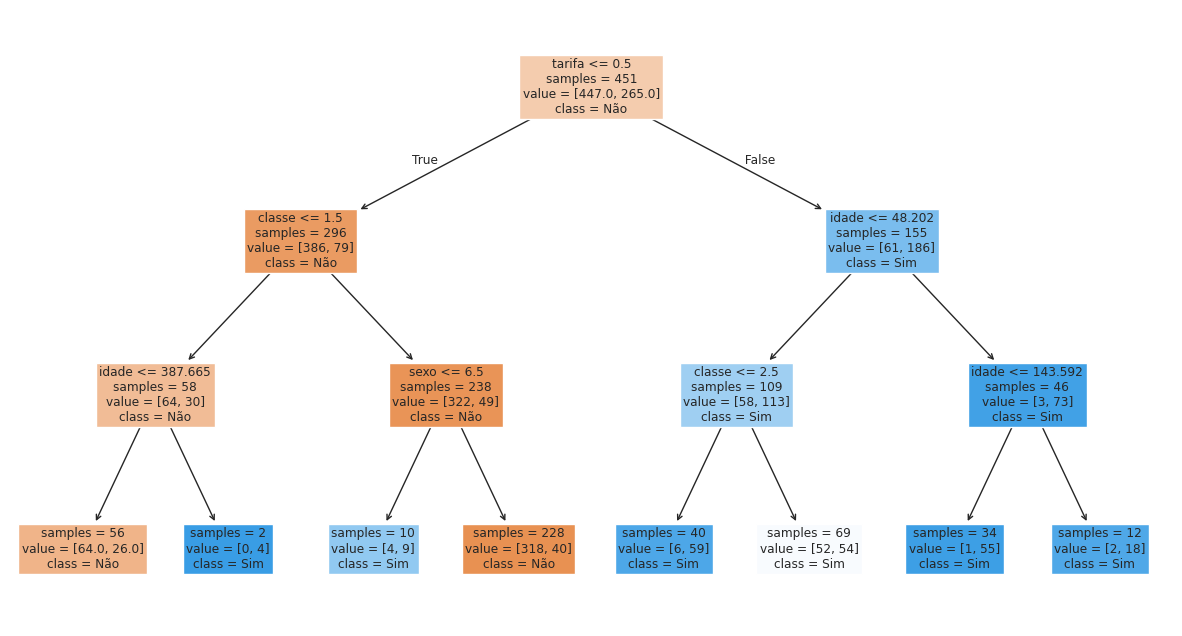

In [17]:
plt.figure(figsize=(15, 8))

plot_tree(
    modelRandFor.estimators_[0],
    feature_names=["classe", "sexo", "idade", "tarifa"],
    class_names=['Não', 'Sim'],
    filled=True,
    impurity=False
)

plt.show()

,Feature,Importancia
3,sexo_Mulher,0.670543
0,classe,0.144495
1,idade,0.097828
2,tarifa,0.087133


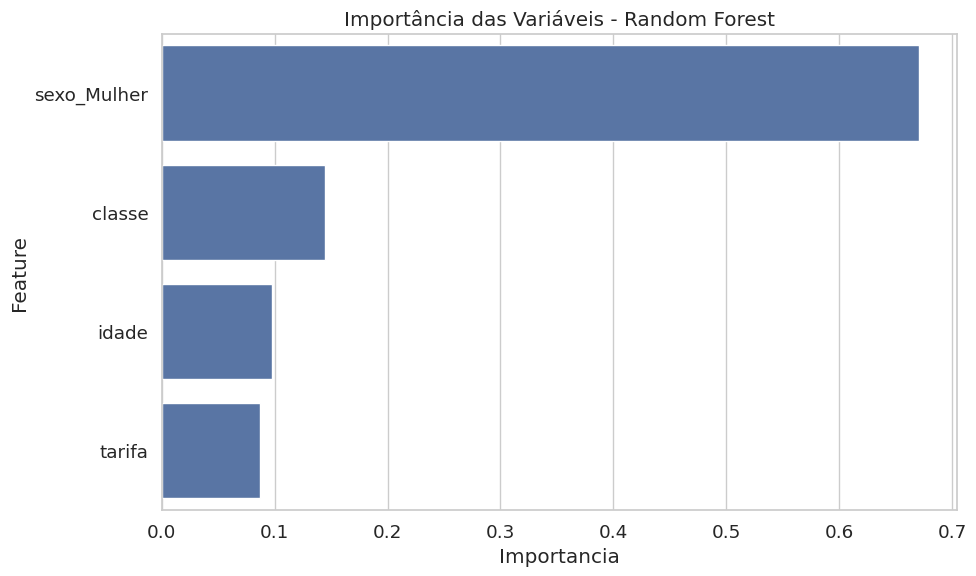

In [19]:
importancias = modelRandFor.feature_importances_
nomes_features = XRandFor.columns

datasetRandFor_importancias = pd.DataFrame({
    'Feature': nomes_features,
    'Importancia': importancias
})

datasetRandFor_importancias.sort_values(by='Importancia', ascending=False, inplace=True)

display(datasetRandFor_importancias)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Feature', data=datasetRandFor_importancias)
plt.title("Importância das Variáveis - Random Forest")
plt.tight_layout()
plt.show()